In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest
from scipy.stats.stats import pearsonr
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\Hakate\AppData\Local\Temp\ipykernel_11980\4058323872.py:7: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [14]:
df=pd.read_csv('de01-data.csv', header=0,delimiter=',', encoding='utf-8')
df

,TimeToPlay,TimeToStudy,ProfessionalScore,InterviewScore,Sexuality,ExpectedSalary,SocialNetworkingTimeUse,Result
0,0.1,4.4,2.5,F,T,249.6,Much,NO
1,4.1,5.7,3.7,D,L,114.6,Pretty,YES
2,7.3,0.9,2.7,D,T,862.0,Almost,NO
3,6.2,8.8,2.7,D,T,147.2,Almost,YES
4,5.0,3.1,0.2,D,Q,653.4,Pretty,NO
...,...,...,...,...,...,...,...,...
995,2.9,6.3,1.2,C,Q,512.1,Almost,YES
996,3.8,1.5,2.8,B,T,267.6,Almost,NO
997,7.4,0.6,1.3,D,Q,884.2,None,YES
998,8.5,5.7,3.3,C,L,662.2,Pretty,YES


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

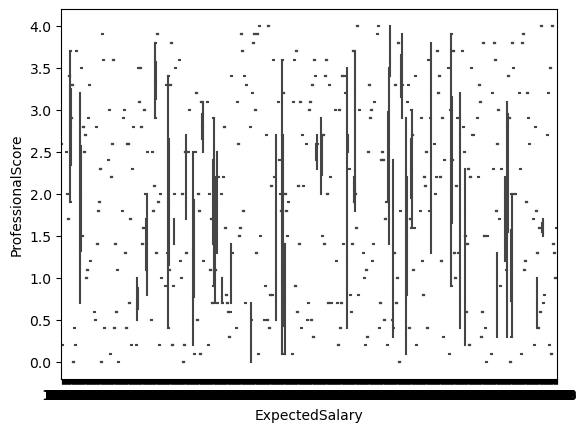

In [16]:
sns.boxplot(data=df, x =  'ExpectedSalary', y='ProfessionalScore')
plt.show()

In [17]:
df_TGLQB=df[['Sexuality', 'ProfessionalScore']]
df_TGLQB

,Sexuality,ProfessionalScore
0,T,2.5
1,L,3.7
2,T,2.7
3,T,2.7
4,Q,0.2
...,...,...
995,Q,1.2
996,T,2.8
997,Q,1.3
998,L,3.3


In [18]:
df_TGLQB.sort_values(by='Sexuality', ascending=True)

,Sexuality,ProfessionalScore
643,B,2.4
523,B,2.2
893,B,1.5
520,B,3.9
170,B,2.1
...,...,...
892,T,1.8
500,T,2.0
167,T,0.3
177,T,0.7


In [20]:
pearsonr(df['TimeToPlay'],df['TimeToStudy'])

PearsonRResult(statistic=0.031653978519957215, pvalue=0.31731761129902203)

In [21]:
df[['TimeToPlay','TimeToStudy']].corr()

,TimeToPlay,TimeToStudy
TimeToPlay,1.000000,0.031654
TimeToStudy,0.031654,1.000000


<module 'matplotlib.pyplot' from 'c:\\Users\\Hakate\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

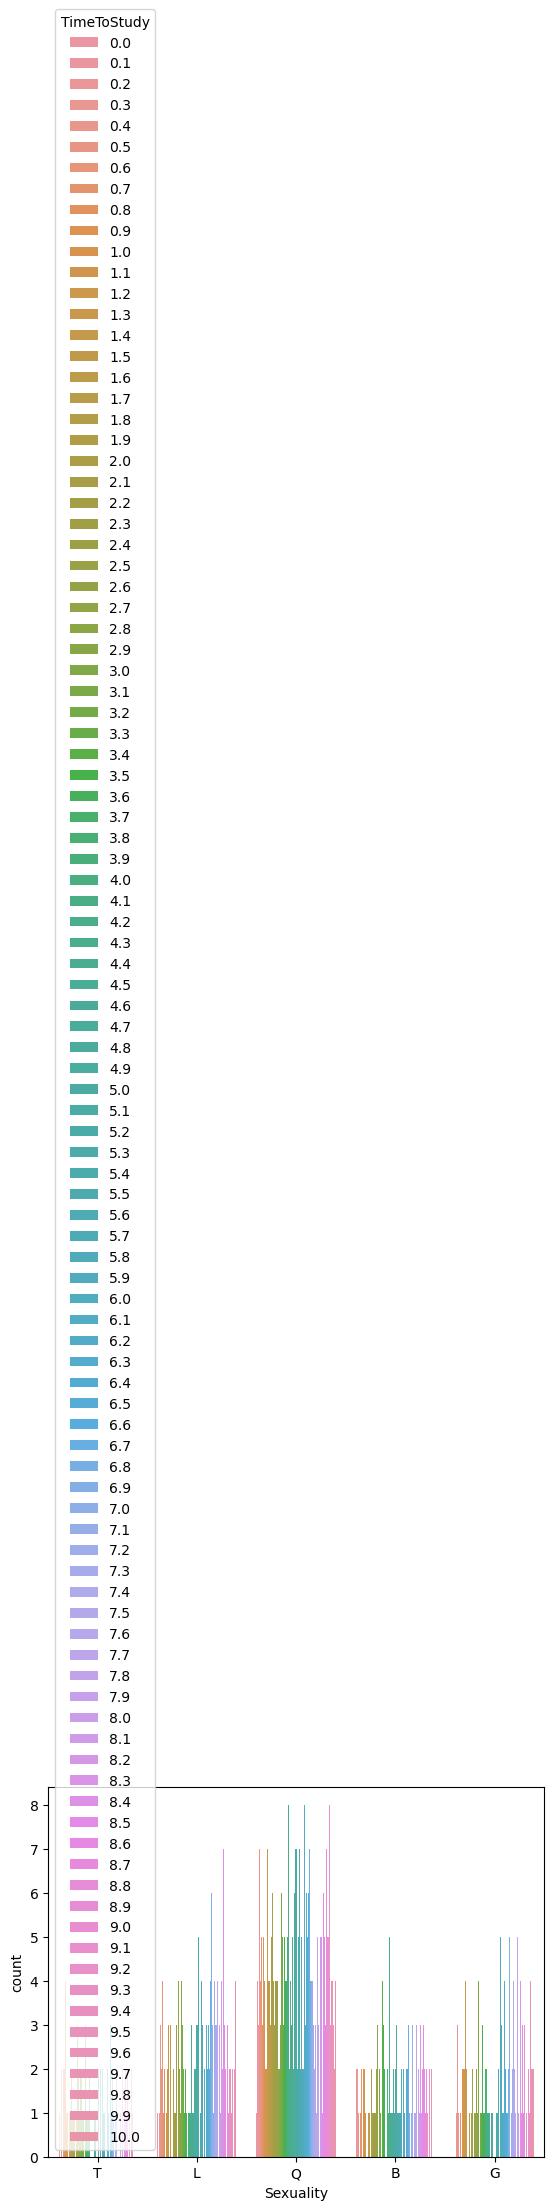

In [23]:
sns.countplot(x='Sexuality', hue='TimeToStudy',data=df)
plt

In [24]:
X_with_constant = sm.add_constant(df[["TimeToStudy","TimeToPlay"]].values)

y=df[['ProfessionalScore']].values

#perfoming the regression: thực hiện hồi quy
result=sm.OLS(y, X_with_constant).fit()

#result of statsmodels: 
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.253
Date:                Wed, 25 Oct 2023   Prob (F-statistic):              0.286
Time:                        10:08:49   Log-Likelihood:                -1550.3
No. Observations:                1000   AIC:                             3107.
Df Residuals:                     997   BIC:                             3121.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8134      0.096     18.860      0.0

<module 'matplotlib.pyplot' from 'c:\\Users\\Hakate\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

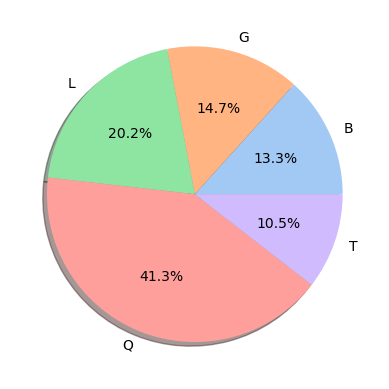

In [25]:
gb=df.groupby(['Sexuality'])['Sexuality'].agg(['count'])

labels=gb.index
data=list(gb['count'])

colors=sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt

In [26]:
crosdata=pd.crosstab(df['Sexuality'], [df['InterviewScore']], rownames=['Sexuality'], colnames=['InterviewScore'])
crosdata

InterviewScore,A,B,C,D,F
Sexuality,,,,,
B,5,24,30,42,32
G,8,19,40,46,34
L,9,37,64,54,38
Q,16,65,126,122,84
T,6,15,31,32,21
